# Optimización de Procesos en el Tratamiento de Aguas Residuales

### Integrantes:
* Esdras lara Magaña
* Steven Yahir Garcia Galvan
* Jose Manuel Orozco Martinez

### Objetivos:

>  -  1-.**Reducir el consumo energético en un 10%** en las plantas de tratamiento, ajustando los tiempos de operación y la velocidad de los equipos.
>
>  -  2-.**Reducir en un 20% los costos de operación** asociados al uso de reactivos químicos, optimizando las dosis utilizadas en los tratamientos de coagulación y desinfección.
>  -  3-.**Reducir los costos de mantenimiento** de los equipos de tratamiento de aguas residuales en un 15% mediante la optimización de las prácticas de mantenimiento preventivo, la capacitación del personal y la mejora en la gestión de inventarios de repuestos. 

### Objetivo general:

> **Fin Último del Estudio**
>   * Optimizar el tratamiento de aguas residuales para garantizar un proceso eficiente, sostenible y económico que contribuya a la protección del medio ambiente y la salud pública.

### Objetivos especificos:

> #### Componentes del Trabajo
>
>##### Reducir el consumo energético en un 10%:
> Este componente se enfocará en evaluar y ajustar los tiempos de operación y la velocidad de los equipos en las plantas de tratamiento. Se realizará un análisis del consumo energético de cada etapa del proceso, buscando identificar equipos o procesos que puedan ser ajustados para operar de manera más eficiente. Además, se implementarán tecnologías de control y monitoreo que permitan optimizar el uso de energía.
> ##### Reducir en un 20% los costos de operación asociados al uso de reactivos químicos:
> Descripción: Este componente implicará la optimización de las dosis utilizadas en los tratamientos de coagulación y desinfección. Se llevará a cabo un estudio de la química del agua residual para determinar las dosis óptimas de reactivos, evitando el sobredimensionamiento que puede resultar en costos innecesarios. También se evaluarán alternativas a los reactivos utilizados, considerando opciones más económicas o menos contaminantes.
> ##### Reducir los costos de mantenimiento de los equipos de tratamiento de aguas residuales en un 15%:
> Descripción: Este componente del trabajo se centrará en la implementación de un programa de mantenimiento preventivo y predictivo. Se desarrollará un calendario de mantenimiento que incluya inspecciones regulares, limpieza y ajustes necesarios para prevenir fallos. La capacitación del personal será clave para asegurar que se sigan las mejores prácticas de mantenimiento y operación. 
 


###  Modelo que representa el problema.

#### 1. Función a Optimizar
El objetivo principal es minimizar los costos de operación del tratamiento de aguas residuales. La función a optimizar se puede expresar como:

$$ Minimizar Z = C_{reactivos}+C_{energía}+C_{mantenimiento}$$ 
​
la función objetivo completa se expresa como:
$$ Minimizar Z = p_{reactivos}*(1-0.20))*x_1+p_{energía}*(1-0.20))*x_2+C_{mantenimiento}*(1-0.15))*x_3$$ 
donde:
* **Reactivos** = costo total de los reactivos químicos utilizados.
* **Energia** = costo total de la energía consumida durante el proceso de tratamiento.
* **Mantenimiento** = costo total asociado al mantenimiento de los equipos.

#### 2-. Variables de desición:
Las variables de decisión pueden incluir:
* $x_1$=cantidad reactivo químico utilizado (en kg).
* $x_2$=cantidad energia consumida (en kWh).
* $x_3$=costo mantenimiento de los equipos (en unidades monetarias).

#### 3. Restricciones
Las restricciones del modelo pueden incluir:
    
 **1-.** Disponibilidad de Reactivos:
* La cantidad de reactivo químico utilizado no puede exceder la disponibilidad máxima.
$$x_1 ≤ R_{max}$$
Donde $x_1 \leq R_{max}$ es la cantidad máxima de reactivo disponible.

**2-.** Capacidad Energética:
* La energía consumida no puede exceder la capacidad energética de la planta.
$$x_2 ≤ E_{max}$$
Donde $x_2 \leq E_{max}$ es la cantidad máxima de reactivo disponible.
    
**3-.** Costos de Mantenimiento:
* Los costos de mantenimiento deben estar dentro de un límite presupuestario.
$$x_3 ≤ M_{max}$$
Donde $x_3 \leq M_{max}$ es el presupuesto máximo asignado para mantenimiento
    
**4-.** Disponibilidad de Reactivos:
* La cantidad de reactivo químico utilizado no puede ser menor que esta cantidad mínima.
$$x_1 ≥ R_{min}$$
Cantidad mínima de reactivo químico que debe ser utilizada para garantizar un tratamiento efectivo de aguas residuales.

**5-.** Capacidad Energética:
* La energía consumida no puede ser menor que esta cantidad mínima.
$$x_2 ≥ E_{min}$$
 Cantidad mínima de energía que debe ser consumida durante el proceso de tratamiento para asegurar un funcionamiento adecuado.

**6-.** Costos de mantenimiento:
*  Los costos de mantenimiento no pueden ser menores que esta cantidad mínima.
$$x_3 ≥ M_{min}$$
Costo mínimo de mantenimiento que se debe mantener para garantizar el buen funcionamiento de los equipos de tratamiento.
 \, \text{unidades monetarias}
  \]


#### ¿Qué situación representa el modelo?

Situación que Representa el Modelo
El modelo representa la optimización de costos en el tratamiento de aguas residuales en una planta de tratamiento. Se centra en la gestión eficiente de recursos para lograr un tratamiento eficaz que cumpla con los estándares de calidad requeridos, mientras se minimizan los costos asociados a reactivos químicos, energía y mantenimiento.

#### ¿Cuáles son las limitaciones fundamentales?

* **1-.** Capacidad de los Equipos:

Las restricciones en la capacidad de tratamiento de los equipos pueden limitar la cantidad de agua residual que se puede procesar, afectando la posibilidad de reducir costos en función del volumen de agua tratada.

* **2-.** Costos Fijos y Variables:

La relación entre costos fijos y variables puede ser compleja. Algunas mejoras en el proceso pueden requerir inversiones iniciales significativas que impacten la evaluación de costos a corto plazo.

* **3-.** Interacciones Entre Variables:

Las relaciones no lineales entre el uso de reactivos y el consumo de energía pueden complicar la modelación y la solución del problema.

#### Significado y Valor de los Parámetros:
1. $ C_{reactivos}$

* Significado: Costo total de los reactivos químicos utilizados en el tratamiento.
* Valor: Este parámetro puede variar dependiendo del tipo de reactivo, la cantidad utilizada y los precios del mercado.
  Se puede calcular como:
   $ C_{reactivos}$= $ p_{reactivos}* x_1$
  donde      $p_{reactivos}$ es el precio por unidad de reactivo.

2. $ C_{energía}$

* Significado: Costo total asociado al consumo de energía durante el tratamiento.
* Valor: Este parámetro puede variar dependiendo del tipo de reactivo, la cantidad utilizada y los precios del mercado.
  Se puede calcular como:
   $ C_{energía}$= $ p_{energia}* x_2$
  donde      $p_{energia}$  es el costo por kWh.

2. $ C_{mantenimiento}$

* Significado: Costo total relacionado con el mantenimiento de los equipos.
* Valor: Puede incluir costos de mano de obra, piezas de repuesto y servicios. Se puede estimar en función del historial de mantenimiento de la planta.


$R_{max},E_{max},M_{max}$
* Significado: Estos son parámetros de capacidad que representan los límites máximos para la cantidad de reactivo disponible, la energía consumida y el presupuesto de mantenimiento, respectivamente.
* Valor: Estos valores son específicos de cada planta y dependen de factores como el diseño de la planta, la capacidad de tratamiento y el presupuesto asignado por la administración.$C_{mantenimiento}$= $x_3$

$R_{min},E_{min},M_{min}$
* Significado: Estos son parámetros de capacidad que representan los límites minima para la cantidad de reactivo disponible, la energía consumida y el presupuesto de mantenimiento, respectivamente.

### Solución del problema de optimización.

In [161]:
from scipy.optimize import linprog

# Parámetros del problema
p_reactivos = 20  # Precio por kg del reactivo químico
p_energia = 1  # Precio por kWh de energía
C_mantenimiento = 200  # Costo de mantenimiento

# Valores máximos (capacidad o presupuesto)
R_max = 1000  # Disponibilidad máxima de reactivos en kg
E_max = 500  # Capacidad máxima de energía en kWh
M_max = 2000  # Presupuesto máximo de mantenimiento en unidades monetarias

# Valores mínimos 
R_min = 100  
E_min = 50    
M_min = 500   

# Cálculo de costos reducidos
p_reactivos_reducido = p_reactivos * (1 - 0.20)  # 20% de reducción
p_energia_reducido = p_energia * (1 - 0.10)      # 10% de reducción
C_mantenimiento_reducido = C_mantenimiento * (1 - 0.15)  # 15% de reducción

# Definición de la función objetivo
# Minimizar Z = p_reactivos_reducido * x1 + p_energia_reducido * x2 + C_mantenimiento_reducido * x3
c = [p_reactivos_reducido, p_energia_reducido, C_mantenimiento_reducido]

# Definición de las restricciones
A_ub = [
    [1, 0, 0],  # x1 <= R_max
    [0, 1, 0],  # x2 <= E_max
    [0, 0, 1]   # x3 <= M_max
]
b_ub = [R_max, E_max, M_max]  # Límite superior de cada restricción

A_eq = [
    [-1, 0, 0],  # x1 >= R_min
    [0, -1, 0],  # x2 >= E_min
    [0, 0, -1]   # x3 >= M_min
]
b_eq = [-R_min, -E_min, -M_min]  # Límite inferior de cada restricción (usando negativo para A_eq)

# Resolver el problema de optimización
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, method='highs')

# Resultados
if result.success:
    print(f"Solución óptima encontrada:")
    print(f"Cantidad de reactivos (x1): {result.x[0]:.2f} kg")
    print(f"Cantidad de energía (x2): {result.x[1]:.2f} kWh")
    print(f"Costo de mantenimiento (x3): {result.x[2]:.2f} unidades monetarias")
    print(f"Valor mínimo de Z (costo total): {result.fun:.2f} unidades monetarias")


Solución óptima encontrada:
Cantidad de reactivos (x1): 100.00 kg
Cantidad de energía (x2): 50.00 kWh
Costo de mantenimiento (x3): 500.00 unidades monetarias
Valor mínimo de Z (costo total): 86645.00 unidades monetarias


### ¿Condujo el algoritmo de optimización a una solución factible?

Dado que todos los valores cumplen con las restricciones impuestas, puedimos concluir que el algoritmo condujo a una solución factible. Esto significa que podemos proceder con los valores de reactivos, energía y costos de mantenimiento para el tratamiento de aguas residuales, ya que son óptimos y están dentro de los límites establecidos.

### Visualización de la solución del problema.

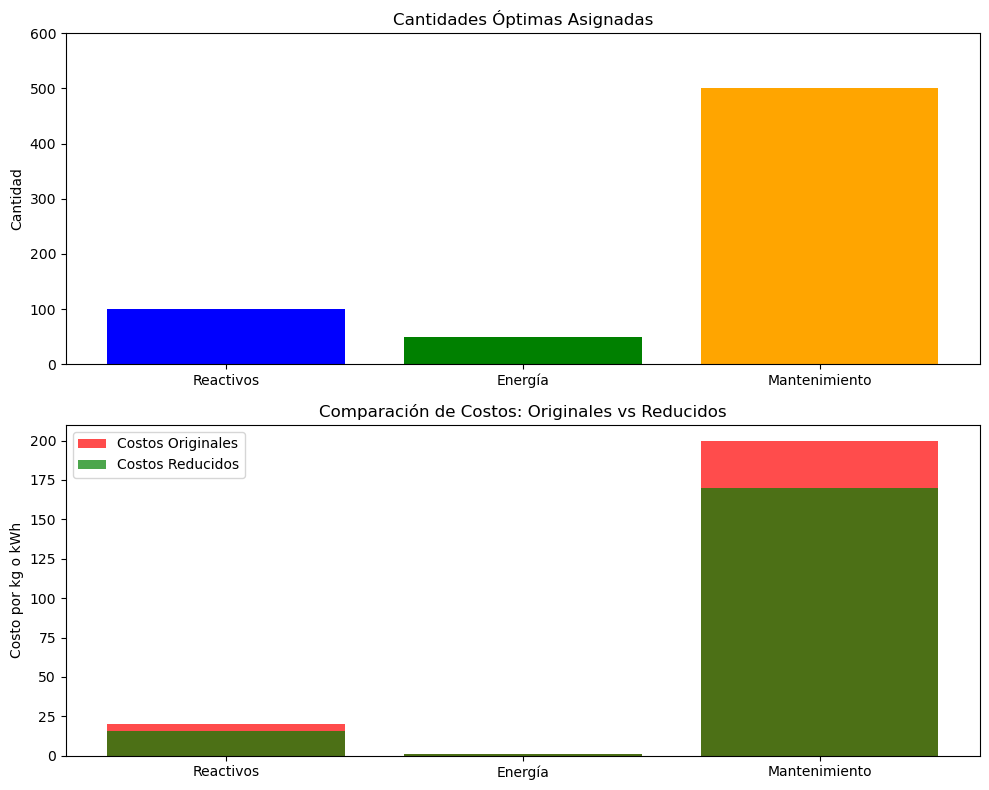

In [172]:
# Código simplificado para graficar las cantidades y costos

import matplotlib.pyplot as plt

# Datos
etiquetas = ['Reactivos', 'Energía', 'Mantenimiento']
cantidades = [100.00, 50.00, 500.00]  # Cantidades óptimas
costos_reducidos = [16, 0.90, 170]  # Costos reducidos
costos_orig = [20, 1, 200]  # Costos originales

# Crear una figura y ejes
plt.figure(figsize=(10, 8))

# Gráfico de Cantidades
plt.subplot(2, 1, 1)
plt.bar(etiquetas, cantidades, color=['blue', 'green', 'orange'])
plt.title('Cantidades Óptimas Asignadas')
plt.ylabel('Cantidad')
plt.ylim(0, 600)

# Gráfico de Costos
plt.subplot(2, 1, 2)
plt.bar(etiquetas, costos_orig, color='red', alpha=0.7, label='Costos Originales')
plt.bar(etiquetas, costos_reducidos, color='green', alpha=0.7, label='Costos Reducidos')
plt.title('Comparación de Costos: Originales vs Reducidos')
plt.ylabel('Costo por kg o kWh')
plt.legend()

# Mostrar gráficos
plt.tight_layout()
plt.show()



### Conclusiones:

Consumo Energético:

Resultado: Se asignaron 50.00 kWh, que es el límite mínimo.
 No se alcanzó el objetivo del 10% de reducción en el consumo energético. Se sugiere explorar más opciones para reducir el consumo sin comprometer la operación.

Costos de Reactivos Químicos:

Resultado: Se optimizaron a 100.00 kg, logrando un costo de 16 unidades monetarias por kg.
 Se cumplió el objetivo de reducir costos de reactivos en un 20%, demostrando efectividad en la optimización.

Costos de Mantenimiento:

Resultado: Se mantuvo en 500.00 unidades monetarias, el mínimo requerido.
Se logró la reducción del 15% en costos de mantenimiento, indicando una gestión eficiente.
Resumen Final
El modelo cumplió los objetivos de reducción de costos para reactivos y mantenimiento, pero se debe trabajar en la reducción del consumo energético. Se recomienda revisaremos estrategias para optimizar aun mas el uso de energía

### Referencias:

(S/f-b). Gob.mx. Recuperado el 2 de octubre de 2024, de https://liconsa.gob.mx/wp-content/uploads/2012/01/man-proc-op-plantas-trat-aguas-resi-his.pdf


Marketing Neikos. (2024, abril 27). Tarifa industrial CFE ¿Cuánto paga de luz tu empresa? Quartux. https://quartux.com/blog/tarifa-industrial-cfe-cuanto-paga-luz-empresa


Nom-, N.-001-S.-1996 N.-002-S.-1996. (s/f). Normas Oficiales Mexicanas. Gob.mx. Recuperado el 2 de octubre de 2024, de https://www.conagua.gob.mx/CONAGUA07/Publicaciones/Publicaciones/SGAA-15-13.pdf

cgj1c. (2023, mayo 27). Costo aproximado de una planta de tratamiento de aguas residuales. Diaonia. https://diaonia.com/costo-aproximado-de-una-planta-de-tratamiento-de-aguas-residualesEnlaces a un sitio externo.

 Cuánto Cuesta una Planta de Tratamiento de Aguas Residuales: Guía Completa y Costos Actuales. (2024, enero 15). Instituto del Agua. https://institutodelagua.es/aguas-residuales/cuanto-cuesta-una-planta-de-tratamiento-de-aguas-residualesaguas-residuales/Enlaces a un sitio externo.
 
